In [2]:
import pandas as pd

train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
test = pd.read_csv('data/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('data/unlabeledTrainData.tsv', 
                              header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [3]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [4]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

In [5]:
KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [6]:
sentences = []
for review in train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)

/Users/leesu/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/leesu/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [7]:
for review in unlabeled_train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)

/Users/leesu/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/leesu/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/leesu/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup

In [8]:
len(sentences)

795538

In [9]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [11]:
sentences[1][:10]

['mayb', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into']

In [12]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [16]:
# !pip install gensim

In [17]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

2018-02-16 17:16:09,140 : INFO : 'pattern' package not found; tag filters are not available for English
2018-02-16 17:16:09,143 : INFO : collecting all words and their counts
2018-02-16 17:16:09,144 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-02-16 17:16:09,189 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2018-02-16 17:16:09,230 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2018-02-16 17:16:09,271 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2018-02-16 17:16:09,313 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2018-02-16 17:16:09,354 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2018-02-16 17:16:09,394 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2018-02-16 17:16:09,436 : INFO : PROGRESS: at senten

2018-02-16 17:16:12,656 : INFO : PROGRESS: at sentence #710000, processed 15880371 words, keeping 82560 word types
2018-02-16 17:16:12,699 : INFO : PROGRESS: at sentence #720000, processed 16105658 words, keeping 83036 word types
2018-02-16 17:16:12,741 : INFO : PROGRESS: at sentence #730000, processed 16332039 words, keeping 83571 word types
2018-02-16 17:16:12,785 : INFO : PROGRESS: at sentence #740000, processed 16553072 words, keeping 84127 word types
2018-02-16 17:16:12,831 : INFO : PROGRESS: at sentence #750000, processed 16771399 words, keeping 84599 word types
2018-02-16 17:16:12,885 : INFO : PROGRESS: at sentence #760000, processed 16990803 words, keeping 85068 word types
2018-02-16 17:16:12,950 : INFO : PROGRESS: at sentence #770000, processed 17217940 words, keeping 85644 word types
2018-02-16 17:16:13,009 : INFO : PROGRESS: at sentence #780000, processed 17448086 words, keeping 86160 word types
2018-02-16 17:16:13,071 : INFO : PROGRESS: at sentence #790000, processed 176751

2018-02-16 17:16:58,818 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-02-16 17:16:58,819 : INFO : EPOCH - 3 : training on 17798263 raw words (12872091 effective words) took 14.6s, 881935 effective words/s
2018-02-16 17:16:59,825 : INFO : EPOCH 4 - PROGRESS: at 7.54% examples, 965938 words/s, in_qsize 7, out_qsize 0
2018-02-16 17:17:00,834 : INFO : EPOCH 4 - PROGRESS: at 15.29% examples, 973503 words/s, in_qsize 7, out_qsize 0
2018-02-16 17:17:01,837 : INFO : EPOCH 4 - PROGRESS: at 23.04% examples, 978046 words/s, in_qsize 7, out_qsize 0
2018-02-16 17:17:02,845 : INFO : EPOCH 4 - PROGRESS: at 30.86% examples, 982327 words/s, in_qsize 7, out_qsize 0
2018-02-16 17:17:03,848 : INFO : EPOCH 4 - PROGRESS: at 38.45% examples, 980040 words/s, in_qsize 7, out_qsize 0
2018-02-16 17:17:04,854 : INFO : EPOCH 4 - PROGRESS: at 45.23% examples, 961541 words/s, in_qsize 7, out_qsize 0
2018-02-16 17:17:05,865 : INFO : EPOCH 4 - PROGRESS: at 52.73% examples, 960939 words/s, in_

In [18]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2018-02-16 17:17:25,178 : INFO : precomputing L2-norms of word weight vectors
2018-02-16 17:17:25,264 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2018-02-16 17:17:25,264 : INFO : not storing attribute vectors_norm
2018-02-16 17:17:25,266 : INFO : not storing attribute cum_table
2018-02-16 17:17:25,546 : INFO : saved 300features_40minwords_10text


In [19]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [20]:
model.wv.doesnt_match("france england germany berlin".split())

2018-02-16 17:19:49,143 : WARNING : vectors for words {'france', 'germany'} are not present in the model, ignoring these words


'berlin'

In [21]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6332573890686035),
 ('ladi', 0.49687057733535767),
 ('businessman', 0.49059179425239563),
 ('lad', 0.48820623755455017),
 ('millionair', 0.4731273949146271),
 ('farmer', 0.4724937677383423),
 ('widow', 0.46067678928375244),
 ('chap', 0.4536878764629364),
 ('doctor', 0.44979941844940186),
 ('men', 0.44923272728919983)]

In [22]:
model.wv.most_similar("queen")

[('princess', 0.6137595176696777),
 ('goddess', 0.5556578636169434),
 ('madam', 0.5555622577667236),
 ('stepmoth', 0.5450707077980042),
 ('nun', 0.5383387804031372),
 ('maid', 0.5353434681892395),
 ('regina', 0.5350804328918457),
 ('dame', 0.532431423664093),
 ('latifah', 0.5298020839691162),
 ('eva', 0.5194208025932312)]

In [23]:
# model.wv.most_similar("awful")

In [24]:
model.wv.most_similar("film")

[('movi', 0.8580907583236694),
 ('flick', 0.6232894659042358),
 ('documentari', 0.5616419911384583),
 ('pictur', 0.5424283742904663),
 ('cinema', 0.5176143050193787),
 ('masterpiec', 0.49536505341529846),
 ('it', 0.4928705096244812),
 ('sequel', 0.48987531661987305),
 ('effort', 0.479716956615448),
 ('genr', 0.47115376591682434)]

In [25]:
# model.wv.most_similar("happy")
model.wv.most_similar("happi") # stemming 처리 시 

[('unhappi', 0.4598982334136963),
 ('bitter', 0.42242431640625),
 ('happier', 0.41669800877571106),
 ('sad', 0.40227487683296204),
 ('afraid', 0.40066930651664734),
 ('satisfi', 0.39483681321144104),
 ('proud', 0.3898850381374359),
 ('glad', 0.38559651374816895),
 ('lucki', 0.38198021054267883),
 ('sadden', 0.3699966371059418)]

In [26]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

2018-02-16 17:21:51,823 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2018-02-16 17:21:52,066 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2018-02-16 17:21:52,067 : INFO : setting ignored attribute vectors_norm to None
2018-02-16 17:21:52,068 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2018-02-16 17:21:52,069 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2018-02-16 17:21:52,070 : INFO : setting ignored attribute cum_table to None
2018-02-16 17:21:52,071 : INFO : loaded 300features_40minwords_10text
/Users/leesu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


11986
[-0.01878953 -0.01169866  0.03662574 -0.04327893  0.04661641 -0.06281613
 -0.03108795  0.05996996  0.08538448 -0.03210034]


In [27]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [28]:
df.head(10)

,x,y
with,-5.588987,3.093441
all,-0.544423,3.532905
this,0.594165,2.701551
stuff,3.274967,1.205073
go,0.672281,-6.382988
down,-7.867859,3.238681
at,-7.597872,5.352013
the,-2.477339,3.922580
moment,2.309082,8.409800
mj,-9.938303,-2.670248


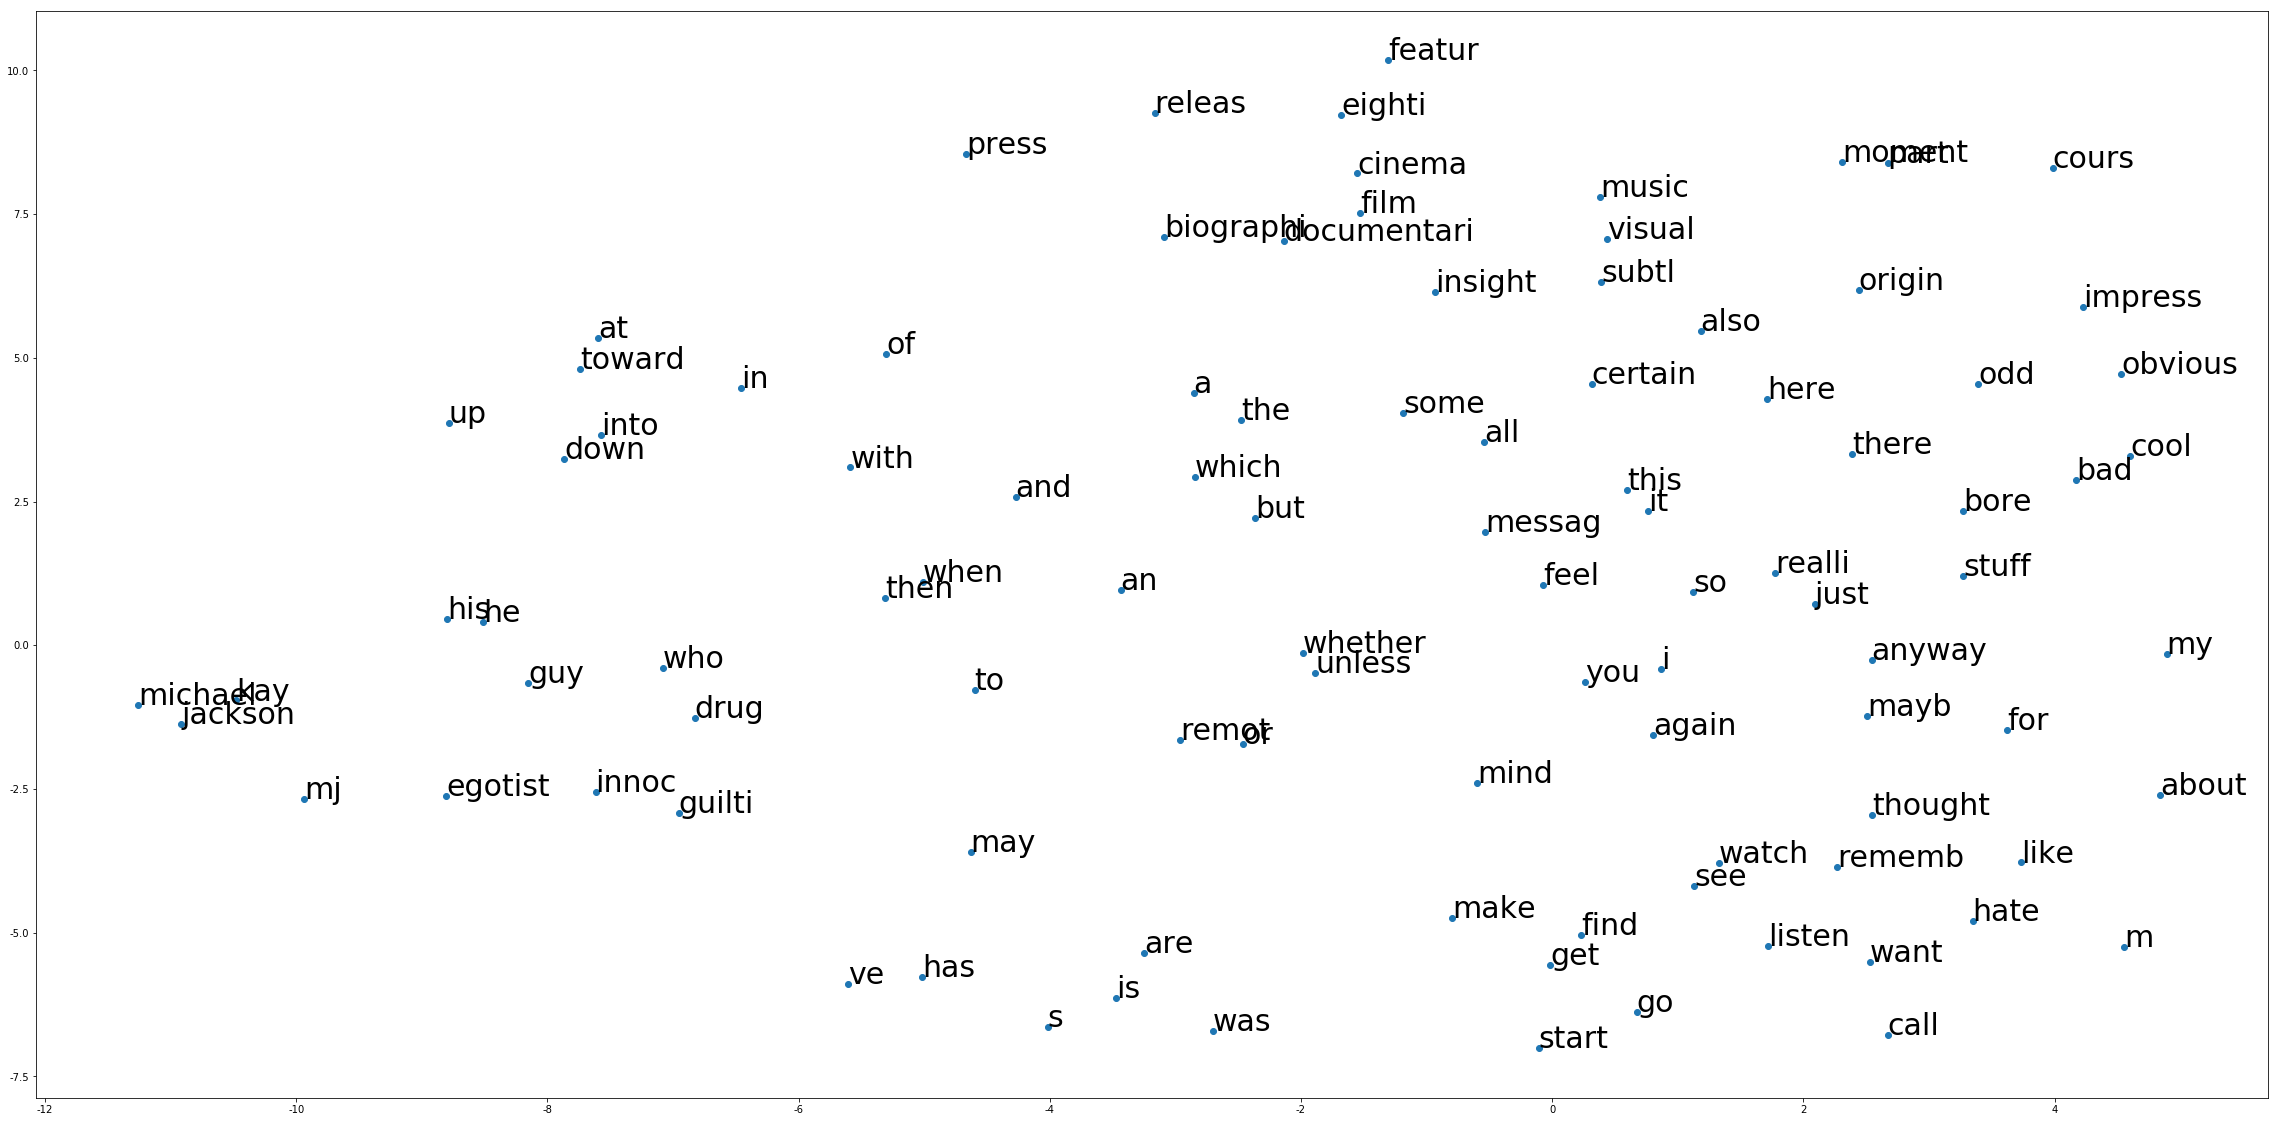

In [29]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [30]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [31]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews),num_features),dtype="float32")
    
    for review in reviews:
       # 매 1000개 리뷰마다 상태를 출력
       if counter%1000. == 0.:
           print("Review %d of %d" % (counter, len(reviews)))
       # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
       reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       # 카운터를 증가시킨다.
       counter = counter + 1.
    return reviewFeatureVecs

In [32]:
# 멀티스레드로 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(\
        reviews["review"], KaggleWord2VecUtility.review_to_wordlist,\
        workers=4)
    return clean_reviews

In [33]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train), model, num_features ) 

Review 0 of 25000


/Users/leesu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
CPU times: user 43.3 s, sys: 872 ms, total: 44.1 s
Wall time: 1min 22s


In [34]:
%time testDataVecs = getAvgFeatureVecs(\
        getCleanReviews(test), model, num_features )

Review 0 of 25000


/Users/leesu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
CPU times: user 39.4 s, sys: 678 ms, total: 40.1 s
Wall time: 1min 16s


In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

In [36]:
%time forest = forest.fit( trainDataVecs, train["sentiment"] )

CPU times: user 46.3 s, sys: 91.9 ms, total: 46.4 s
Wall time: 12.1 s


In [37]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, trainDataVecs, \
    train['sentiment'], cv=10, scoring='roc_auc'))

CPU times: user 6min 53s, sys: 1.26 s, total: 6min 55s
Wall time: 1min 52s


In [38]:
score

0.90431356799999985

In [39]:
result = forest.predict( testDataVecs )

In [40]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv('data/Word2Vec_AverageVectors_{0:.5f}.csv'.format(score), 
              index=False, quoting=3 )

In [41]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

40


0    12520
1    12480
Name: sentiment, dtype: int64

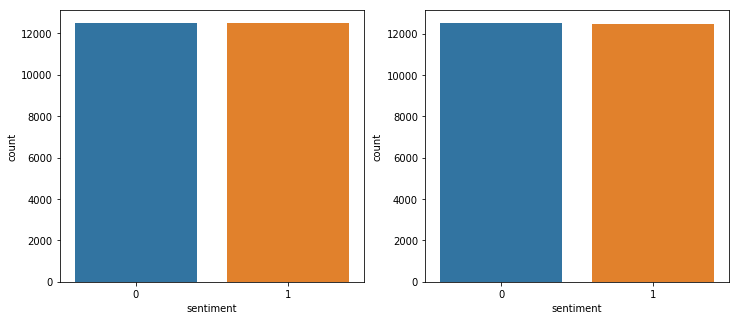

In [42]:
import seaborn as sns 
%matplotlib inline

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])